# Diskrete Fourier Transformation
Dieses Jupyter Notebook basiert auf folgenden Quellen und erläutert die Grundlagen der Diskreten Fourier Transformation: 
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html
https://youtu.be/spUNpyF58BY

## Einführung
Ziel der diskreten Fourier Transformation ist die Abbildung eines zeitdiskreten, endlichen Signals auf ein diskretes, periodisches Frequenzspektrum. Das in der folgenden Abbildung rot dargestellte Signal im Zeitbereich wird hierzu in die einzelnen Frequenzen im Frequenzbereich blau dargestellt zerlegt.
![](time_frequency.png)
Ziel der DFT ist daher, ein Signal aus der Zeitdomäne mithilfe der Summe von Sinus-Wellen verschiedener Frequenzen darzustellen. Sie ist wie folgt definiert: 
$$ X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}$$

mit

* N = Anzahl der Samples
* n = aktuelles Sample
* k = aktuelle Frequenz, wobei $ k\in [0,N-1]$
* $x_n$ = der Sinus-Wert an der Stelle n
* $X_k$ = die DFT mit Information über Amplitude und Phase

Der obige Ausdruck ist von der *Eulerschen Formel* abgeleitet, welche trigonometrische Funktionen mit der komplexen exponentiellen Funktion verbindet: $e^{i\cdot x} = cosx+i\cdot sinx$

Aufgrund der mathematischen Eigenschaften der Transformation gilt $X_0 = \sum_{n=0}^{N-1}x_n$. 
Falls $N$ ungerade ist, enthalten die Elemente $X_1, X_2, ..., X_{(N-1)/2}$ die positiven Frequenzen und die Elemente $X_{(N+1)/2}, ..., X_{N-1}$ enthaltendie negativen Frequenzterme.
Falls $N$ gerade ist, enthalten die Elemente $X_1, X_2, ..., X_{N/2-1}$ die positiven Frequenzterme und die Elemente $X_{N/2},...,X_{N-1}$ die negativen Terme.
Falls das Eingangssignal $x$ eine reelle Sequenz ist, ist das Ergebnis der DFT $X_n$ für positive Frequenzen die Konjugierte der Werte $X_n$ für negative Frequenzen, das Spektrum ist symmetrisch. Daher werden üblicherweise ausschließlich die positiven Frequenzen betrachtet.

$X_k$ ist eine komplexe Zahl, die sowohl Amplitude als auch die Phaseninformation der komplexen sinusförmigen Komponente $e^{i\cdot 2\pi kn/N}$ der Funktion $x_n$. Die Amplitude und Phase können wir folgt berechnet werden:

$$amp = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$$
$$phase = atan2(Im(X_k), Re(X_k))$$

wobei $Im(X_k)$ und $Re(X_k)$ die imaginären und realen Anteile der komplexen Nummer darstellen und die $atan2$-Funktion die Funktionsvariante der $arctan$-Funktion mit zwei Argumenten ist.

Die Amplitude der errechneten DFT entspricht der Amplitude der Eingangssignale, sofern sie mit der Anzahl der Samples $N$ normiert wird. Da das Spektrum jedoch für reelwertige Sequenzen wie oben beschrieben symmetrisch ist, betrachten wir lediglich eine Seite des Ergebnisses und teilen daher durch $N/2$.

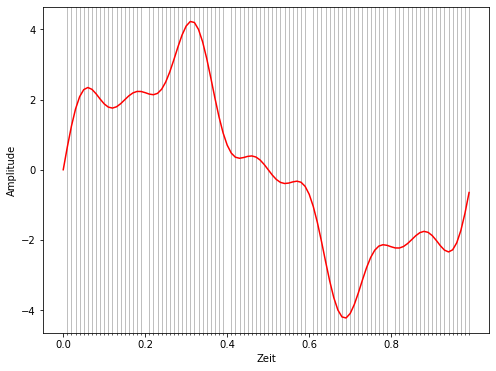

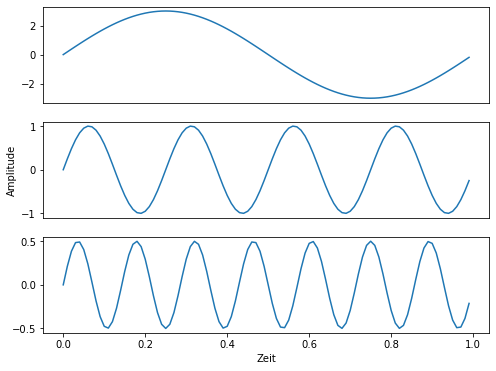

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import time

%matplotlib inline
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x1 = 3*np.sin(2*np.pi*freq*t)

freq = 4
x2 = np.sin(2*np.pi*freq*t)

freq = 7   
x3 = 0.5* np.sin(2*np.pi*freq*t)

x = x1 + x2 + x3

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.gca().set_xticks(np.arange(0,1,step=0.01),minor=True)
plt.gca().set_xticks(np.arange(0,1,step=0.2),minor=False)
plt.grid(True, which='minor')
plt.show()
plt.figure(figsize = (8,6))
plt.subplot(3,1,1),plt.plot(t,x1),plt.xticks([])
plt.subplot(3,1,2),plt.plot(t,x2),plt.xticks([]),plt.ylabel('Amplitude')
plt.subplot(3,1,3),plt.plot(t,x3)
plt.xlabel('Zeit')
plt.show()

In [2]:
# Aufgabe: Implementieren Sie die DFT
def DFT(x):
    # Funktion zur Berechnung der diskreten Fouriertransformation
    # eines 1D reellwertigen Signals x
    
    return 0

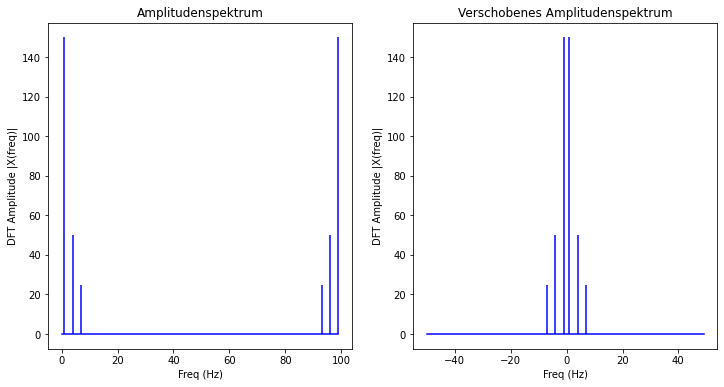

In [20]:
X = DFT(x)

# berechne die Frequenzen
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('Amplitudenspektrum')

plt.subplot(1,2,2)
plt.stem(freq-N/2, np.fft.fftshift(abs(X)), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('Verschobenes Amplitudenspektrum')
plt.show()

Auf obiger Grafik ist zu sehen, dass die Ausgabe der DFT symmetrisch zur halben Abtastrate liegen (hier: Abtastrate fs = 100 Hz). Diese halbe Abtastrate wird **Nyquist Frequenz** genannt. Nyquist und Shannon haben das sog. Nyquist-Shannon-Theorem formuliert, nach dem ein Signal mit einer Abtastrate fs vollständig rekonstruiert werden kann, sofern es ausschließlich Frequenzanteile unterhalb der halben Abtastrate enthält. Zur besseren Darstellung können die Frequenzen verschoben werden, sodass 0 Hz zentriert wird. Die Darstellung der Frequenzen 93 Hz, 96 Hz und 99 Hz werden dabei aufgrund der Symmetrieeigenschaften der Fouriertransformation um die Abtastrate fs = 100 Hz auf -1 Hz, -4 Hz und -7 Hz verschoben.
Untenstehender Code visualisiert daher nur noch die Frequenzanteile unterhalb der Nyquist-Frequenz.

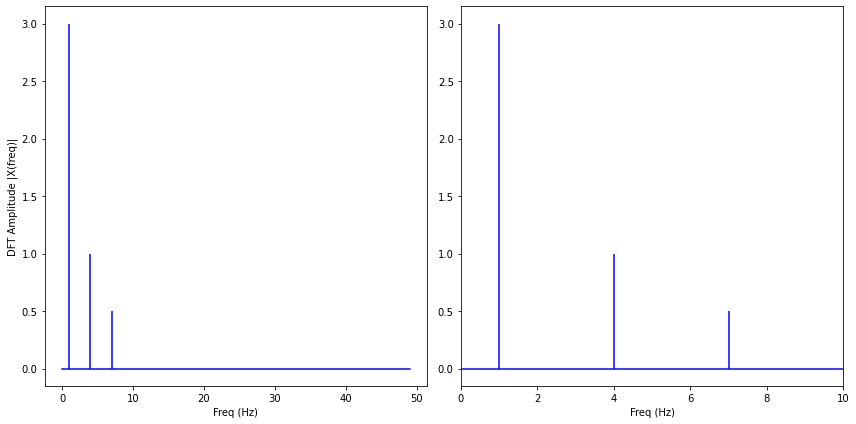

In [4]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

## Inverse Diskrete Fourier Transformation iDFT
Mit der inversen diskreten Fourier Transformation lässt sich aus dem Frequenzspektrum heraus die diskrete Zeitfunktion berechnen. 
$$ x_n = \frac{1}{N}\sum_{k=0}^{N-1}{X_k\cdot e^{i\cdot 2\pi{kn/N}}}$$

In [6]:
def iDFT(X):
    # Funktion zur Berechnung des Zeitsignals 
    # abhängig vom Frequenzspektrum
    
    return 0

C:\Users\info\anaconda3\envs\Bildverarbeitung\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


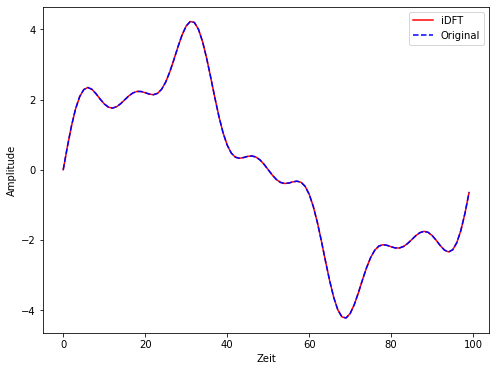

In [7]:
x_new = iDFT(X)
plt.figure(figsize = (8, 6))
plt.plot(x_new, 'r', label='iDFT')
plt.plot(x, 'b--', label='Original')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Anwendung im 2D-Raum
Für die Bildverarbeitung wird die Fouriertransformation ebenfalls verwendet. Es ergeben sich folgende Formeln:
$$ F(u,v) = \sum_{x=0}^{M-1}{\sum_{y=0}^{N-1}{f(x,y)\cdot e^{-i2\pi{(ux / M + vy / N)}}}}$$
$$ f(x,y) = \frac{1}{MN}\sum_{u=0}^{M-1}{\sum_{v=0}^{N-1}{F(u,v) \cdot e^{i\cdot 2\pi{(ux / M + vy / N)}}}}$$
Diese Formeln werden nun bei einigen Bildern angewendet.

### Beispiel #1
![](./img/fourier1.jpg)
Periodisches Muster, Drehung 45°. Welche Auswirkungen ergeben sich für die FFT? Wie wird ein Tiefpassfilter im Frequenzraum angewendet? 

<ipython-input-19-ca35879b0d3e>:42: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(img_fft_tief)), cmap = 'inferno'), plt.title('FFT Tiefpass-gefiltert')


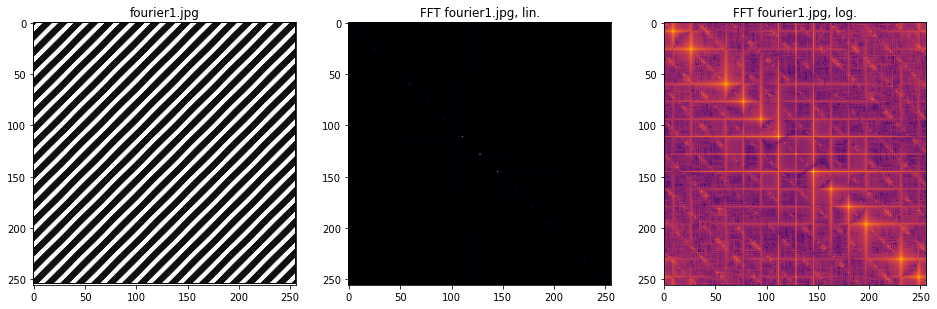

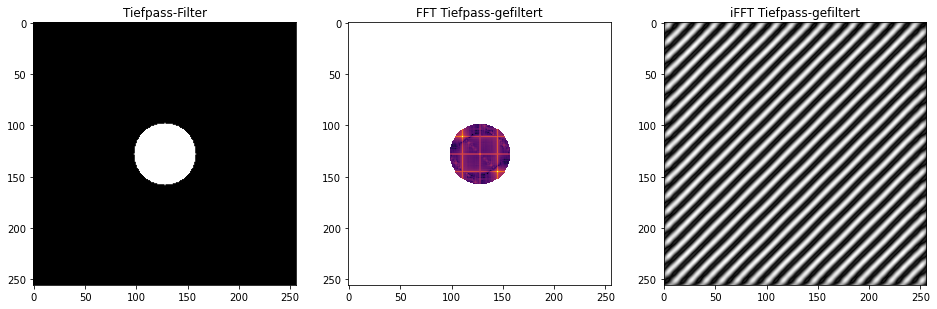

In [19]:
# von DFT zu FFT: https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

# wende DFT auf Beispielbild an und stelle Frequenzspektrum dar
img = cv.imread('./img/fourier1.jpg',0)

# FFT Transform
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('fourier1.jpg')
# lineare Darstellung
plt.subplot(1,3,2)
plt.title('FFT fourier1.jpg, lin.')
plt.imshow(np.abs(img_fft), cmap = 'inferno')
# logarithmische Darstellung
plt.subplot(1,3,3)
plt.title('FFT fourier1.jpg, log.')
plt.imshow(20*np.log(np.abs(img_fft)), cmap = 'inferno')

# idealer Tiefpassfilter
# - lässt kleine Frequenzen passieren
# - blockiert hohe Frequenzen (z.B. Rauschen)
# f(u,v) = 1, wenn u^2 + v^2 <= f_cutoff
#        = 0, andernfalls
freq_cutoff = 30
filter_tief = np.zeros(img_fft.shape)
center = np.array(filter_tief.shape) / 2
for u in range(img_fft.shape[0]):
    for v in range(img_fft.shape[1]): 
        filter_tief[u,v] = (u - center[0])**2 + (v - center[1])**2 <= freq_cutoff**2

# Anwendung des Filters mithilfe des Faltungs-Theorems
img_fft_tief = img_fft * filter_tief
img_ifft_tief = (np.fft.ifft2(img_fft_tief))

# Darstellung des Ergebnisses
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(filter_tief, cmap = 'gray'), plt.title('Tiefpass-Filter')
plt.subplot(1,3,2)
plt.imshow(20*np.log(np.abs(img_fft_tief)), cmap = 'inferno'), plt.title('FFT Tiefpass-gefiltert')
plt.subplot(1,3,3)
plt.imshow(np.abs(img_ifft_tief), cmap = 'gray'), plt.title('iFFT Tiefpass-gefiltert')
plt.show()

### Beispiel #2
![](./img/fourier2.jpg)
Periodisches Muster, Drehung 90°. Welche Auswirkungen ergeben sich für die FFT? (Achten Sie insbesondere auf das linear skalierte Bild der FFT.) Weiterhin wird exemplarisch ein Hochpassfilter angewendet.

<ipython-input-23-8e2468cbc327>:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(img_fft)), cmap = 'inferno')
<ipython-input-23-8e2468cbc327>:40: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(img_fft_hoch)), cmap = 'inferno'), plt.title('FFT Hochpass-gefiltert')


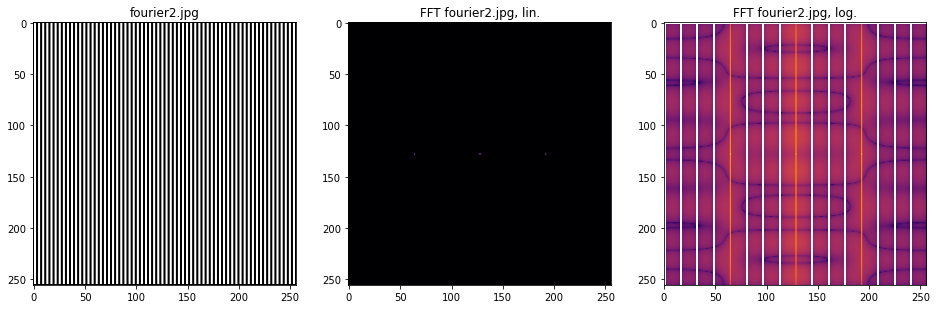

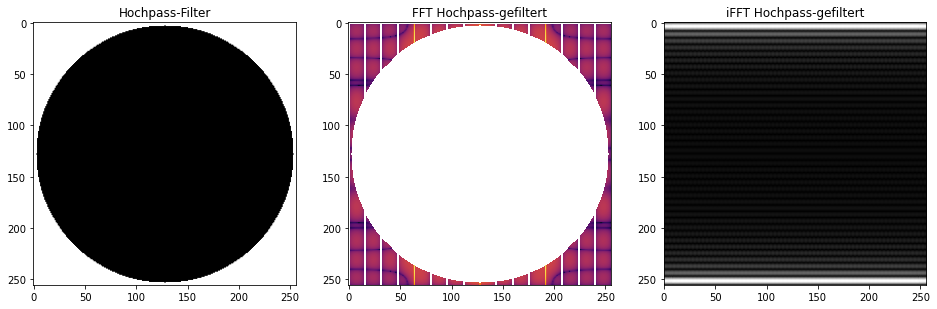

<ipython-input-23-8e2468cbc327>:55: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(img_fft_tief)), cmap = 'inferno'), plt.title('FFT Tiefpass-gefiltert')


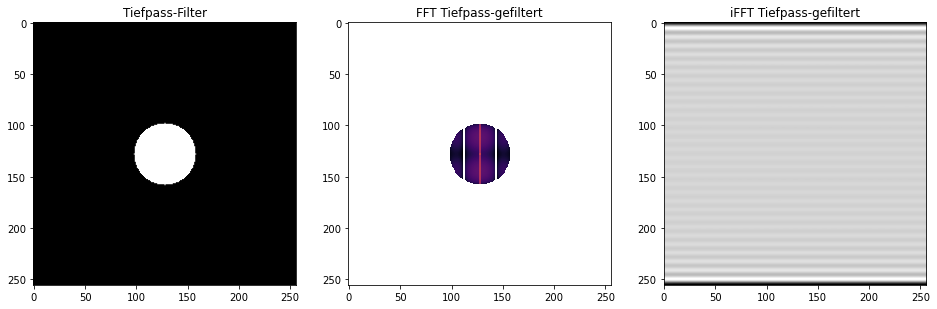

In [23]:
# wende DFT auf Beispielbild an und stelle Frequenzspektrum dar
img = cv.imread('./img/fourier2.jpg',0)

# FFT Transform
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('fourier2.jpg')
# lineare Darstellung
plt.subplot(1,3,2)
plt.title('FFT fourier2.jpg, lin.')
plt.imshow(np.abs(img_fft), cmap = 'inferno')
# logarithmische Darstellung
plt.subplot(1,3,3)
plt.title('FFT fourier2.jpg, log.')
plt.imshow(20*np.log(np.abs(img_fft)), cmap = 'inferno')

# idealer Hochpassfilter
# - lässt hohe Frequenzen passieren
# - blockiert kleine Frequenzen (z.B. "stich")
# f(u,v) = 0, wenn u^2 + v^2 <= f_cutoff
#        = 1, andernfalls
freq_cutoff = 125
filter_hoch = np.zeros(img_fft.shape)
center = np.array(filter_hoch.shape) / 2
for u in range(img_fft.shape[0]):
    for v in range(img_fft.shape[1]): 
        filter_hoch[u,v] = (u - center[0])**2 + (v - center[1])**2 > freq_cutoff**2
        
# Anwendung des Filters mithilfe des Faltungs-Theorems
img_fft_hoch = img_fft * filter_hoch
img_ifft_hoch = np.fft.ifft2(img_fft_hoch)

# Darstellung des Ergebnisses
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(filter_hoch, cmap = 'gray'), plt.title('Hochpass-Filter')
plt.subplot(1,3,2)
plt.imshow(20*np.log(np.abs(img_fft_hoch)), cmap = 'inferno'), plt.title('FFT Hochpass-gefiltert')
plt.subplot(1,3,3)
plt.imshow(np.abs(img_ifft_hoch), cmap = 'gray'), plt.title('iFFT Hochpass-gefiltert')
plt.show()

# Anwendung des Tiefpassfilters
# Anwendung des Filters mithilfe des Faltungs-Theorems
img_fft_tief = img_fft *  filter_tief
img_ifft_tief = np.fft.ifft2(img_fft_tief)

# Darstellung des Ergebnisses
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(filter_tief, cmap = 'gray'), plt.title('Tiefpass-Filter')
plt.subplot(1,3,2)
plt.imshow(20*np.log(np.abs(img_fft_tief)), cmap = 'inferno'), plt.title('FFT Tiefpass-gefiltert')
plt.subplot(1,3,3)
plt.imshow(np.abs(img_ifft_tief), cmap = 'gray'), plt.title('iFFT Tiefpass-gefiltert')
plt.show()

### Beispiel #3
![](./img/fourier3.jpg)
Weißes Kästchen ist mittig im Bild. Welche Auswirkungen hat dies auf die FFT?

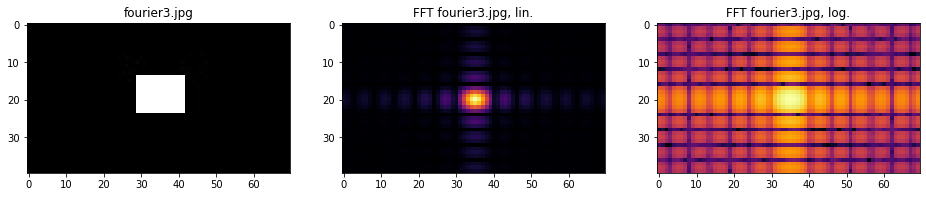

In [10]:
# wende DFT auf Beispielbild an und stelle Frequenzspektrum dar
img = cv.imread('./img/fourier3.jpg',0)

# FFT Transform
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('fourier3.jpg')
# lineare Darstellung
plt.subplot(1,3,2)
plt.title('FFT fourier3.jpg, lin.')
plt.imshow(np.abs(img_fft), cmap = 'inferno')
# logarithmische Darstellung
plt.subplot(1,3,3)
plt.title('FFT fourier3.jpg, log.')
plt.imshow(20*np.log(np.abs(img_fft)), cmap = 'inferno')
plt.show()

### Beispiel #4
![](./img/fourier4.jpg)
Weißes Kästchen ist mittig im Bild, allerdings um 45° gedreht. Welche Auswirkungen hat dies auf die FFT?

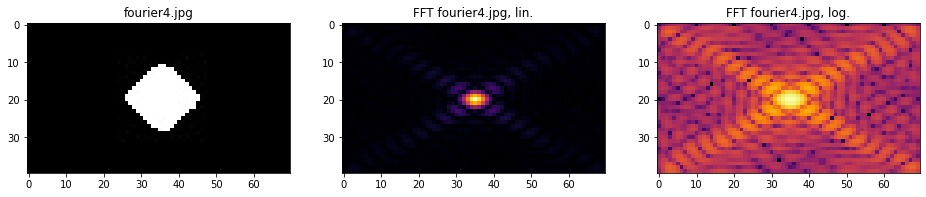

In [11]:
# wende DFT auf Beispielbild an und stelle Frequenzspektrum dar
img = cv.imread('./img/fourier4.jpg',0)

# FFT Transform
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('fourier4.jpg')
# lineare Darstellung
plt.subplot(1,3,2)
plt.title('FFT fourier4.jpg, lin.')
plt.imshow(np.abs(img_fft), cmap = 'inferno')
# logarithmische Darstellung
plt.subplot(1,3,3)
plt.title('FFT fourier4.jpg, log.')
plt.imshow(20*np.log(np.abs(img_fft)), cmap = 'inferno')
plt.show()

### Beispiel #5
![](./img/fourier5.jpg)
Weißes Kästchen ist verschoben im Bild. Welche Auswirkungen hat dies auf die FFT?

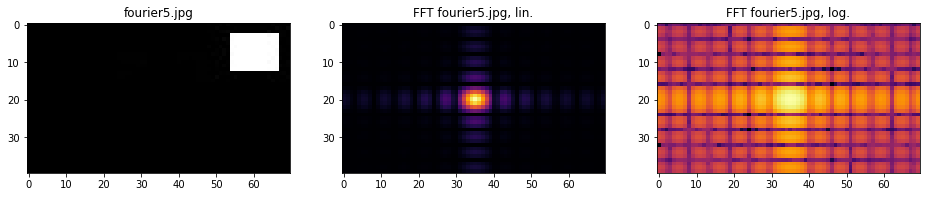

In [12]:
# wende DFT auf Beispielbild an und stelle Frequenzspektrum dar
img = cv.imread('./img/fourier5.jpg',0)

# FFT Transform
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('fourier5.jpg')
# lineare Darstellung
plt.subplot(1,3,2)
plt.title('FFT fourier5.jpg, lin.')
plt.imshow(np.abs(img_fft), cmap = 'inferno')
# logarithmische Darstellung
plt.subplot(1,3,3)
plt.title('FFT fourier5.jpg, log.')
plt.imshow(20*np.log(np.abs(img_fft)), cmap = 'inferno')
plt.show()

### Beispiel 6
![](./img/fourier6.jpg)
Weißes Kästchen ist mittig im Bild, allerdings wurde es vergrößert. Welche Auswirkungen hat dies auf die FFT?

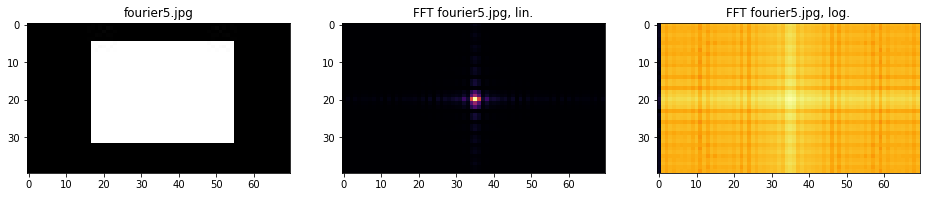

In [13]:
# wende DFT auf Beispielbild an und stelle Frequenzspektrum dar
img = cv.imread('./img/fourier6.jpg',0)

# FFT Transform
img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('fourier5.jpg')
# lineare Darstellung
plt.subplot(1,3,2)
plt.title('FFT fourier5.jpg, lin.')
plt.imshow(np.abs(img_fft), cmap = 'inferno')
# logarithmische Darstellung
plt.subplot(1,3,3)
plt.title('FFT fourier5.jpg, log.')
plt.imshow(20*np.log(np.abs(img_fft)), cmap = 'inferno')
plt.show()

## Zusammenhänge zwischen der Faltung mit bekannten Filtern und Fourier-Transformation

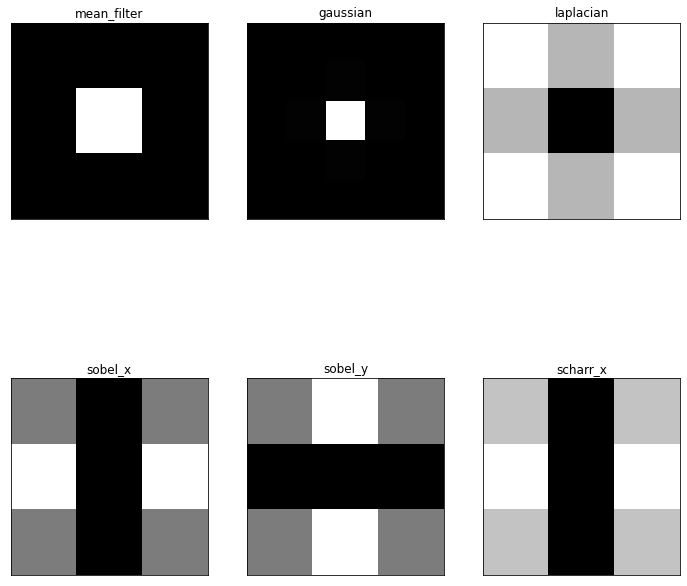

In [14]:
# einfacher Mittelwertfilter
mean_filter = np.ones((3,3))

# Gaußscher Filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T

# verschiedene Kantenfilter
# Scharr in x-Richtung
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# Sobel in x-Richtung
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# Sobel in y Richtung
sobel_y = np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', 'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
plt.figure(figsize=(12,12))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

Laufzeit DFT:  0.046875


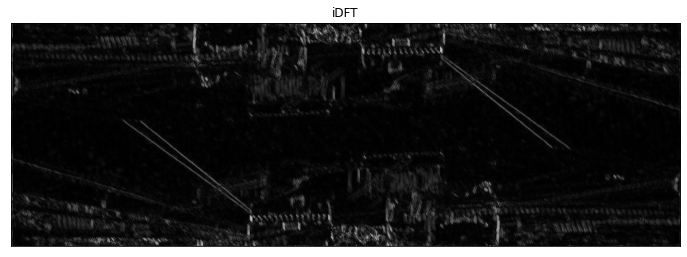

Laufzeit FFT:  0.09375


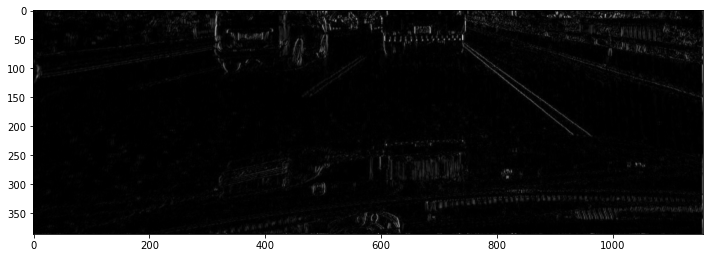

Laufzeit Convol. Filter:  0.015625


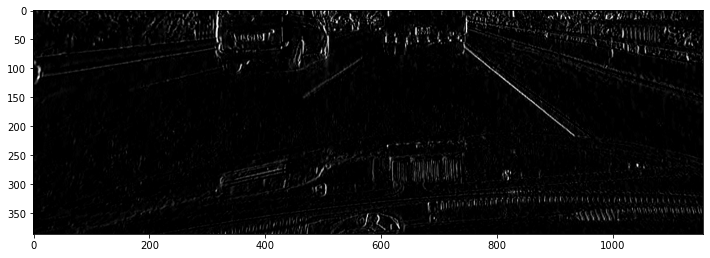

In [15]:
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

img = cv.imread('./img/uclanes_ex.jpg',0)
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobel_x = np.pad(sobel_x, (((img.shape[0]-3)//2,(img.shape[0]-3)//2+1), ((img.shape[1]-3)//2,(img.shape[1]-3)//2+1)), padwithzeros)

t1 = time.process_time()

# Wende Filter im Frequenzbereich mithilfe der DFT + iDFT an
img_dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
img_dft_shift = np.fft.fftshift(img_dft)

sobel_dft = cv.dft(np.float32(sobel_x),flags = cv.DFT_COMPLEX_OUTPUT)
sobel_dft_shift = np.fft.fftshift(sobel_dft)

img_fft_filter = img_dft_shift * sobel_dft_shift
#img_fft_filter = img_dft_shift * sobel_dft_shift
#img_fft_filter = img_dft_shift
img_ishift = np.fft.ifftshift(img_fft_filter)
#img_ishift = img_fft_filter
img_idft = np.fft.fftshift(cv.idft(img_ishift))
img_idft = cv.magnitude(img_idft[:,:,0],img_idft[:,:,1])

t2 = time.process_time()

print('Laufzeit DFT: ', t2-t1)
plt.figure(figsize=(12,6))
plt.imshow(img_idft, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('iDFT')
plt.show()

# Wende Filter mithilfe der FFT + iFFT an
t1 = time.process_time()
img_fft = np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(sobel_x)))
#img_fft = cv.magnitude(img_fft[:,:,0],img_fft[:,:,1])
t2 = time.process_time()
print('Laufzeit FFT: ', t2-t1)
plt.figure(figsize=(12,6))
#plt.imshow(img_fft.astype(np.uint8), cmap = 'gray')
plt.imshow(np.abs(img_fft), cmap = 'gray')
plt.show()

# Wende Filter mithilfe der Convolution an
t1 = time.process_time()
img_filt = cv.filter2D(img,-1,sobel_x)
t2 = time.process_time()
print('Laufzeit Convol. Filter: ', t2-t1)
plt.figure(figsize=(12,6))
plt.imshow(img_filt, cmap = 'gray')
plt.show()

## Aufgabe: Rauschunterdrückung Gauss

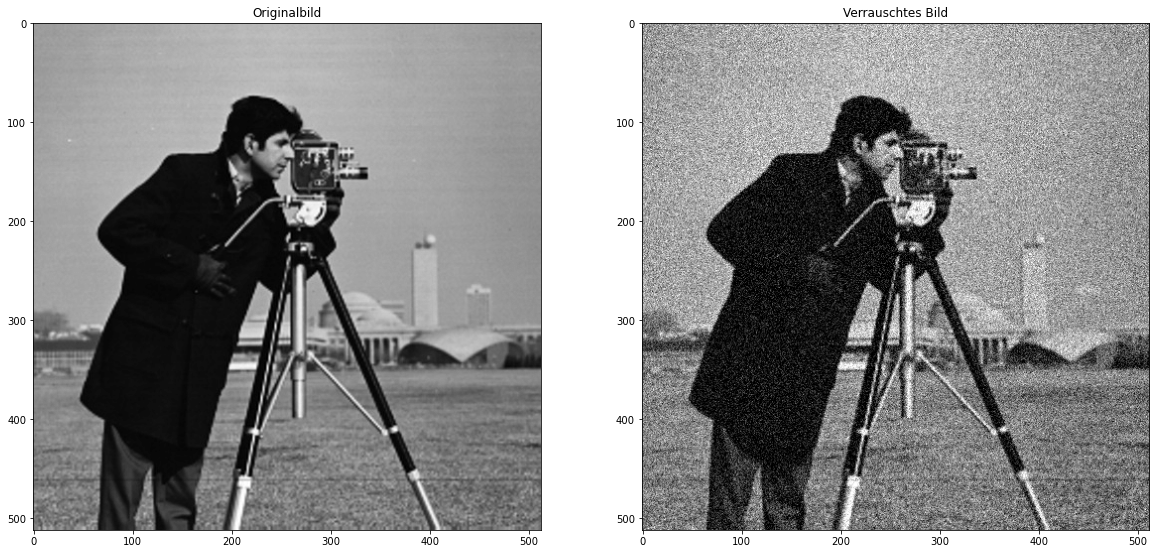

In [24]:
def add_gauss(img, mean = 0, var = 0.1, debug = False):
    row,col = img.shape    
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    
    noisy = np.clip(img + gauss, 0, 255)
    
    if(debug):
        plt.figure()
        plt.hist(gauss.ravel(),256,[-255,255], density=True)
        plt.title('Rauschverteilung Gauss')
        plt.show()
        plt.title('Rauschen')
        plt.imshow(gauss, cmap='gray', vmin=0, vmax=255)
        plt.show()                
    
    return noisy

img = cv.imread('./img/cameraman.bmp', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Originalbild')

# addiere Gaußsches Rauschen
img_noisy = add_gauss(img, 0, 1000)

plt.subplot(1,2,2)
plt.title('Verrauschtes Bild')
plt.imshow(img_noisy, cmap='gray')
plt.show()

# ToDo: Entfernen Sie das Gaußsche Rauschen (Experimentieren Sie mit der FFT / DFT)
# betrachte FFT des ursprünglichen Bildes

## Aufgabe: Periodische Rauschunterdrückung
Im Rahmen des Aufnahmeprozesses digitaler Bilder kann es mit anderen Signalen zu interferenzen kommen, die sich durch periodisches Rauschen bemerkbar machen. Entfernen Sie dieses periodische Rauschen mithilfe der FFT.

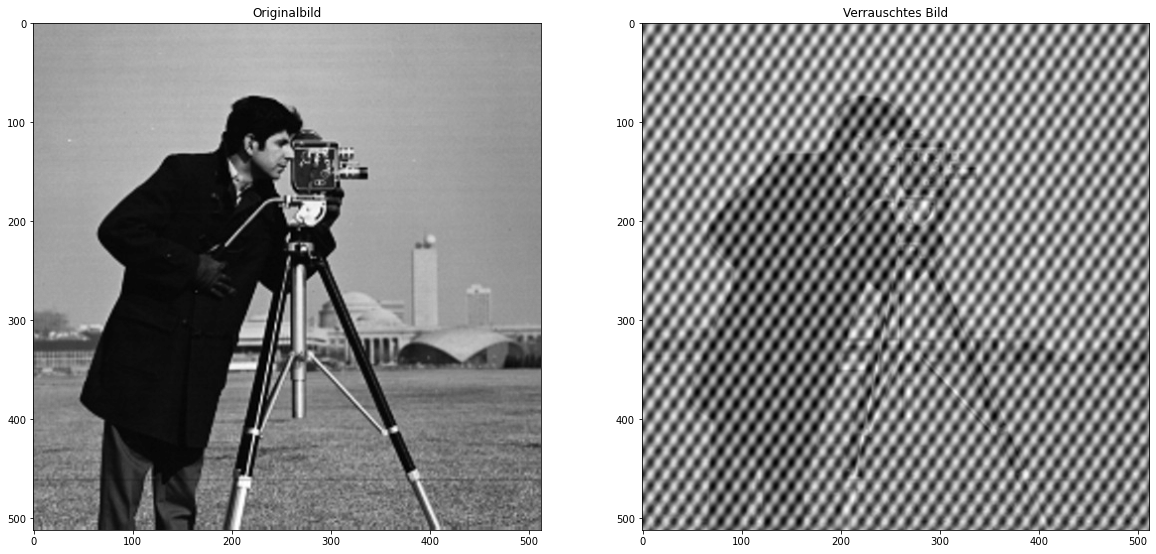

In [25]:
def add_periodic(img, A = 200, u0 = 75, v0 = 50, debug = False):
    row,col = img.shape           
    noisy = np.zeros((row,col), dtype='float64')

    X, Y = np.meshgrid(range(0, col), range(0, row))

    # add 2x different noises
    noisy += A*np.sin(X*u0 + Y*v0)
    noisy += A/2*np.sin(-X*u0 + Y*v0)
    
    if(debug):
        plt.figure()
        plt.title('Rauschen')
        plt.imshow(noisy, cmap='inferno', vmin=0, vmax=255)
        plt.show()  
        
    noisy = img + noisy
    
    return noisy

img = cv.imread('./img/cameraman.bmp', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Originalbild')

# addiere periodisches Rauschen
img_noisy = add_periodic(img)

plt.subplot(1,2,2)
plt.title('Verrauschtes Bild')
plt.imshow(img_noisy, cmap='gray')
plt.show()

# ToDo: Entfernen Sie das Gaußsche Rauschen (Experimentieren Sie mit der FFT / DFT)
# betrachte FFT des ursprünglichen Bildes
